In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd
import os

# Base de données synthétique

In [13]:
data_dir = "data_csv"
os.makedirs(data_dir, exist_ok=True)

In [14]:
def create_synthetic_dataset(file_name="synthetique.csv", n_samples=200, n_features=2, noise=0.1):
    """
    Crée un dataset synthétique et l'enregistre dans le dossier data_csv
    """
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_features,
                               n_redundant=0, n_clusters_per_class=1, flip_y=noise, random_state=42)
    y = 2*y - 1  # Convertir les labels en {-1, 1}

    # Préparer le DataFrame
    data = pd.DataFrame(X, columns=[f"feature_{i+1}" for i in range(n_features)])
    data['label'] = y

    # Chemin complet dans le dossier data_csv
    full_path = os.path.join(data_dir, file_name)
    data.to_csv(full_path, index=False)
    print(f"Dataset synthétique enregistré dans {full_path}")

    return X, y

In [15]:
X,y = create_synthetic_dataset()

Dataset synthétique enregistré dans data_csv\synthetique.csv


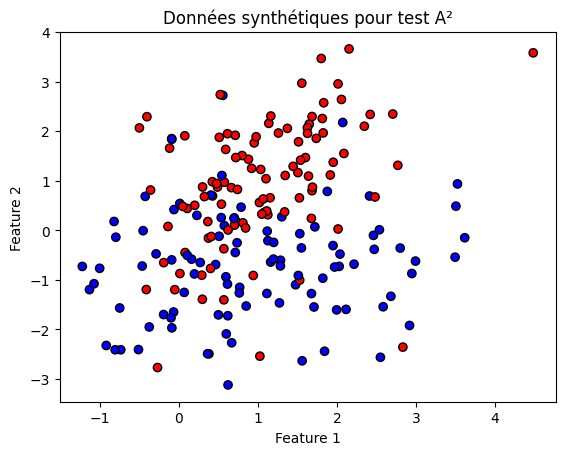

In [16]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k')
plt.title("Données synthétiques pour test A²")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Bases de données UCI

In [17]:
data_dir = "data_csv"
os.makedirs(data_dir, exist_ok=True)

In [18]:
def fetch_uci_dataset(url, columns, label_column, pos_label, neg_label, file_name="uci_dataset.csv"): 
    data = pd.read_csv(url, names=columns) # Convertir en classification binaire 
    data['label'] = data[label_column].apply(lambda x: 1 if x == pos_label else -1) 
    data = data.drop(columns=[label_column])
    full_path = os.path.join(data_dir, file_name) 
    data.to_csv(full_path, index=False) 
    print(f"Dataset UCI enregistré dans {full_path}") 
    return data.iloc[:, :-1].values, data['label'].values

In [19]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length","sepal_width","petal_length","petal_width","class"]
X_uci, y_uci = fetch_uci_dataset(url, columns, label_column="class", pos_label="Iris-setosa", neg_label="Iris-versicolor", file_name="iris.csv")

Dataset UCI enregistré dans data_csv\iris.csv


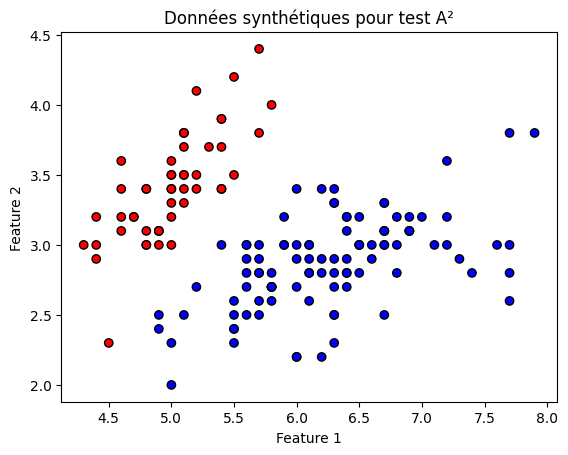

In [20]:
plt.scatter(X_uci[:,0], X_uci[:,1], c=y_uci, cmap='bwr', edgecolor='k')
plt.title("Données synthétiques pour test A²")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()